# Arboles de decisión: Regresión

In [1]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor  
from sklearn import metrics  
from sklearn.tree import export_graphviz
from graphviz import Source

Predecir los consumos de gas (en millones de galones) en 48 estados de EE. UU. Según el impuesto a la gasolina (en centavos), el ingreso per cápita (dólares), las carreteras pavimentadas (en millas) y la proporción de población con una licencia de conducir.

In [2]:
dataset2 = pd.read_csv("petrol_consumption.csv")

Dataset original: http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt

In [3]:
dataset2.head()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
XR = dataset2.drop('Petrol_Consumption', axis=1)  
yR = dataset2['Petrol_Consumption'] 

In [6]:
 XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.3, random_state=0)  

In [7]:
regressor = DecisionTreeRegressor()  
regressor.fit(XR_train, yR_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
yR_pred = regressor.predict(XR_test)

## Validación

In [9]:
df=pd.DataFrame({'Actual':yR_test, 'Predicted':yR_pred})  
df.head(n=3)  

,Actual,Predicted
29,534,541.0
4,410,510.0
26,577,714.0


In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yR_test, yR_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yR_test, yR_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yR_test, yR_pred)))  

Mean Absolute Error: 87.8
Mean Squared Error: 10420.333333333334
Root Mean Squared Error: 102.08003396028694


## Visualización

In [11]:
colnames=XR.columns.values.tolist()
predictors=colnames
predictors

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [12]:
with open ('regresion_tree.dot', "w") as dotfile:
    export_graphviz(regressor, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [13]:
file=open('regresion_tree.dot', "r")
text=file.read()

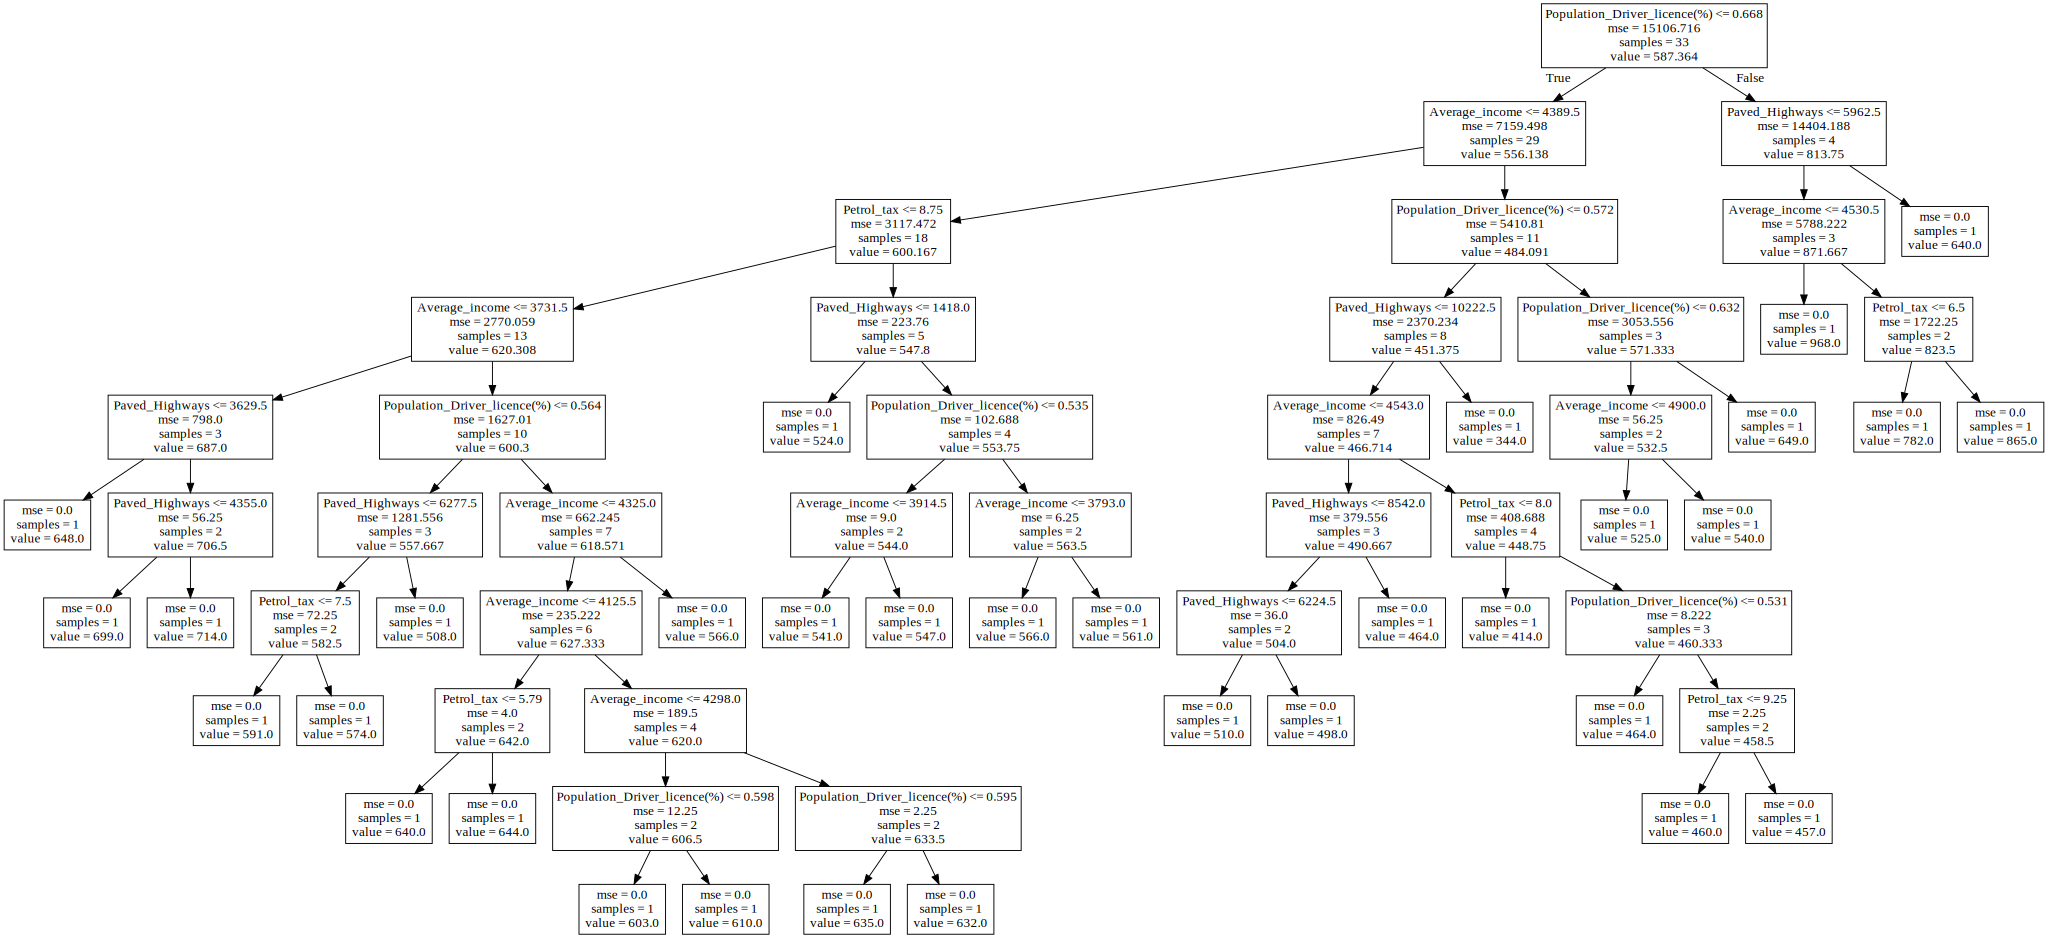

In [14]:
Source(text)